In [43]:
import pandas as pd
import numpy as np

In [81]:
df=pd.read_csv('datasets/Country-data.csv')

In [82]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [83]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [85]:
df.drop('country',axis=1,inplace=True)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(df)

Text(0.5, 1.0, 'Elbow Method')

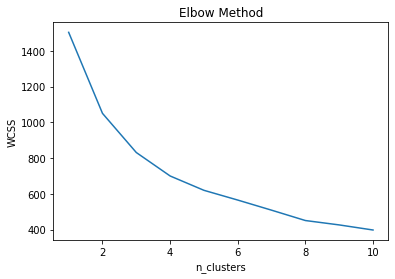

In [87]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i)
    clusters=model.fit_predict(x)
    wcss.append(model.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xlabel('n_clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')


In [61]:
model=KMeans(n_clusters=8)
clusters=model.fit_predict(x)
df['Clusters']=clusters
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,7
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,7
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,7


In [63]:
x=df.drop(['Clusters'],axis=1)
y=df[['Clusters']]

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)


In [65]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 0.06944277,  0.04948308, -0.55118813, ...,  0.19333424,
        -0.39626176, -0.5895595 ],
       [-0.69232108,  0.15044095, -0.24433168, ...,  0.69860054,
        -0.55697793, -0.07046797],
       [-0.8380907 ,  0.28168617,  0.08840423, ...,  1.05336199,
        -1.1355561 ,  0.44240689],
       ...,
       [-0.82163284, -0.71443142,  0.75387606, ...,  1.25761858,
        -0.68555085,  1.98621204],
       [-0.82868621,  0.77301444,  1.77796325, ...,  1.27911927,
        -0.94912536,  3.16219783],
       [-0.18447851, -0.2096421 , -1.13902157, ..., -0.13992651,
         0.10517266, -0.59214978]])

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score,classification_report

In [67]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'NB':GaussianNB(),
    'XGC':XGBClassifier(),
    'RF':RandomForestClassifier()
    
}

In [68]:
for name,model in  models.items():
    print(f'using {name}: ')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'Training Accuracy :{accuracy_score(y_train,model.predict(x_train))}')
    print(f'Testing Accuracy :{accuracy_score(y_test,y_pred)}')
    print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred)}')
    
    print(classification_report(y_test,y_pred))
    print('-'*33)
    

using LR: 
Training Accuracy :0.992
Testing Accuracy :0.8571428571428571
Confusion matrix:
 [[7 1 1 0 0 1]
 [0 8 0 0 0 0]
 [0 0 9 0 1 1]
 [0 0 0 0 0 1]
 [0 0 0 0 6 0]
 [0 0 0 0 0 6]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.89      1.00      0.94         8
           2       0.90      0.82      0.86        11
           5       0.00      0.00      0.00         1
           6       0.86      1.00      0.92         6
           7       0.67      1.00      0.80         6

    accuracy                           0.86        42
   macro avg       0.72      0.75      0.72        42
weighted avg       0.86      0.86      0.85        42

---------------------------------
using KNN: 
Training Accuracy :0.928
Testing Accuracy :0.8809523809523809
Confusion matrix:
 [[ 8  1  1  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  6  0]
 [ 0  0  2  0  0  4]]
              precis

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

Training Accuracy :1.0
Testing Accuracy :0.8571428571428571
Confusion matrix:
 [[ 7  1  2  0  0  0]
 [ 0  7  0  0  0  1]
 [ 1  0 10  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  1  0  0  5]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.88      0.88      0.88         8
           2       0.77      0.91      0.83        11
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         6
           7       0.83      0.83      0.83         6

    accuracy                           0.86        42
   macro avg       0.89      0.89      0.89        42
weighted avg       0.86      0.86      0.86        42

---------------------------------
using RF: 


C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training Accuracy :1.0
Testing Accuracy :0.8333333333333334
Confusion matrix:
 [[ 7  1  1  0  0  1]
 [ 0  7  0  0  0  1]
 [ 1  0 10  0  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  6  0]
 [ 0  0  1  0  0  5]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.88      0.88      0.88         8
           2       0.83      0.91      0.87        11
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         6
           7       0.62      0.83      0.71         6

    accuracy                           0.83        42
   macro avg       0.70      0.72      0.71        42
weighted avg       0.83      0.83      0.82        42

---------------------------------


C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
df=pd.read_csv('datasets/Country-data.csv')

In [70]:
df.drop('country',axis=1,inplace=True)

In [71]:
x=scaler.fit_transform(df)

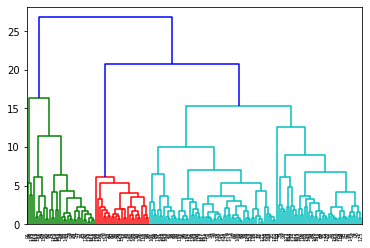

In [72]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))

In [73]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=3)
cluster=model.fit_predict(x)
df['Cluster']=cluster

In [75]:
x=df.drop(['Cluster'],axis=1)
y=df[['Cluster']]

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)


In [77]:
for name,model in  models.items():
    print(f'using {name}: ')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'Training Accuracy :{accuracy_score(y_train,model.predict(x_train))}')
    print(f'Testing Accuracy :{accuracy_score(y_test,y_pred)}')
    print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred)}')
    
    print(classification_report(y_test,y_pred))
    print('-'*33)
    

using LR: 
Training Accuracy :0.936
Testing Accuracy :0.9047619047619048
Confusion matrix:
 [[10  1  0]
 [ 1 27  0]
 [ 0  2  1]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.90      0.96      0.93        28
           2       1.00      0.33      0.50         3

    accuracy                           0.90        42
   macro avg       0.94      0.74      0.78        42
weighted avg       0.91      0.90      0.89        42

---------------------------------
using KNN: 
Training Accuracy :0.872
Testing Accuracy :0.8809523809523809
Confusion matrix:
 [[ 9  2  0]
 [ 0 26  2]
 [ 0  1  2]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.90      0.93      0.91        28
           2       0.50      0.67      0.57         3

    accuracy                           0.88        42
   macro avg       0.80      0.80      0.79        42


C:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate 

Training Accuracy :1.0
Testing Accuracy :0.9523809523809523
Confusion matrix:
 [[11  0  0]
 [ 0 27  1]
 [ 0  1  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.96      0.96      0.96        28
           2       0.67      0.67      0.67         3

    accuracy                           0.95        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.95      0.95      0.95        42

---------------------------------
using RF: 
Training Accuracy :1.0
Testing Accuracy :1.0
Confusion matrix:
 [[11  0  0]
 [ 0 28  0]
 [ 0  0  3]]


C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00         3

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

---------------------------------
